<center>
<img src="https://www.dispatchtrack.com/hubfs/vehicle-routing-scheduling-software.webp" alt="Drawing" style="width: 500px;"/>
</center>

<center><h1> Notebook - Projet A3 - Algorithmique avancée </h1></center>

**Groupe de Projet**

- Rabie HAMADOUCHE

- Pierre YRIARTE

- Sebastien CROUZET

- Djilali HOUADAH

- Paul CALIMACHE

L’ensemble des réalisation techniques ayant étés nécessaires dans le cadre de la rédaction de cette étude est disponible sur GitHub: https://github.com/Sabsten/Projet_Graphe

# Sommaire 
* [Introduction](#introduction)
* [Contexte](#contexte)
* [Choix des contraintes](#choix-des-contraintes)
* [Modélisation du problème](#modélisation-du-problème)
* [Modélisation mathématique du problème](#modélisation-mathématique-du-problème)
* [Complexité](#complexité)
* [Représentation formelle des données](#représentation-formelle-des-données)
  * [Acquisition des données](#1---acquisition-des-données)
  * [Calcul de distance entre les villes](#2---calcul-de-distance-entre-les-villes)
* [Modélisation algorithmique](#modélisation-algorithmique)
  * [Etudes des Algorithmes Heuristiques et Métaheuristiques existants](#etudes-des-algorithmes-heuristiques-et-métaheuristiques-existants)
  * [Implémentation des algorithmes](#implémentation-des-algorithmes)
  * [Comparatif des performances de nos algorithmes](#comparatif-des-performances-de-nos-algorithmes)
  * [Implémentation de OR-Tools](#implémentation-de-la-librairie-or-tools)
  * [Simulation avec contrainte de capacité](#simulation-en-condition-réelle-avec-une-contrainte-de-capacité)
* [Conclusion](#conclusion)
* [Bibliographie](#bibliographie)
  
# Introduction

L'un des enjeux principaux de notre époque, dans le but d'endiguer le phénomène de dérèglement climatique, sera de trouver des axes d’amélioration en ce qui concerne nos consommations d’énergie. Si certains domaines ont déjà entamé cette transition (maisons connectées avec optimisation du chauffage et de l’éclairage, véhicules électriques, réduction des déchets de l’industrie et de l’alimentaire, …), les scientifiques s’accordent à dire que ces efforts demeureront insuffisants. Il est primordial que les entreprises, les institutions et les individus acceptent de faire évoluer leurs habitudes et leur comportement afin de participer à cet effort commun. L’un des axes d’améliorations rapidement identifié est bien entendu l’optimisation des modes de transport et leurs performances en terme de temps et distance parcourue.

# Contexte

Imminent acteur de ce secteur, l’ADEME (Agence de l’Environnement et de la Maîtrise de l’Energie) a dernièrement lancé un appel à manifestation d’intérêt (un mode de présélection des candidats qui seront invités à soumissionner lors de futures procédures de passation de marchés publics) dans le cadre d’un projet de réalisation de démonstrateurs et d’expérimentations de solutions de mobilité. Ces solutions pourront concerner tout aussi bien le transport de personnes mais également de marchandises, et devrons être applicables sur différents types de territoires.

Notre entreprise CesiCDP, composée de 5 personnes (Paul CALIMACHE, Sébastien CROUZET, Rabie HAMADOUCHE, Djilali OUADAH et Pierre YRIARTE) dispose d’ores et déjà de solides connaissances métiers concernant le domaine du transport, ayant déjà réalisé plusieurs études sur le thème de la Mobilité Multimodale Intelligente. Nous souhaitons donc aujourd’hui répondre à l’appel de l’ADEME, dans l’espoir d’obtenir la réalisation de ce travail. Cela devrait nous permettre de conquérir de nouveaux marchés tout en obtenant des financements solides pour la continuité de notre activité.

Etant libre de présenter toute piste de solution permettant de solutionner les problématiques d’ADEME en matière de maîtrise de l’énergie, nous avons choisi d’orienter notre étude sur l’optimisation des tournées de livraison. La problématique que nous souhaiterions résoudre serait de calculer le trajet le plus cours pour un véhicule de livraison sur un réseau routier (contenant un sous-ensemble de villes) permettant de rallier toutes les villes et revenir à son point de départ. Cet appel à manifestation d’intérêt étant très concurrentiel, nous avons cependant besoin d’identifier et de résoudre également des contraintes plus complexes de la gestion des transports. Parmi les premières à nous venir à l’esprit, il y a bien entendu la prise en compte du trafic sur la route, mais également d’autres subtilités relatives aux métiers du transport (besoin d’un véhicule spécifique pour certains produit transportés, différents points de prélèvements en départ du trajet….). Notre objectif sera de couvrir un maximum de cas de figure afin d’être en mesure de satisfaire l’ADEME et remporter l’appel d’offre.

# Choix des contraintes

**Obligatoires :**

Notre solution devra répondre à un ensemble de problématiques relatives à la génération et l’optimisation d’une tournée de livraison sur un réseau routier composé d’un ensemble de villes à parcourir. L’objectif sera d’obtenir des tournées de durée optimale, permettant aux livreurs de revenir à leur point de départ et terminer leur journée le plus tôt possible et ne pas déborder de leurs horaires de travail. 

Notre algorithme devra prendre plusieurs facteurs en compte. Le premier facteur que nous intégrerons dans notre algorithme sera la connaissance du trafic habituel sur les axes routiers reliant les villes concernées par la livraison. Ce dernier devra être pris en compte dans le calcul du trajet, afin par exemple d’éviter un axe de courte distance mais étant très régulièrement saturé. 

**Facultatives :**

De plus, afin de maximiser les chances que notre projet soit retenu par l’ADEME, nous avons décidé d’implémenter deux contraintes supplémentaires afin de valoriser notre savoir-faire. D’une part, nous gérerons également l’affluence des routes en direct : le trajet le plus court sera recalculé à chaque passage dans une ville, en prenant en compte le trafic actuellement présent sur les axes de circulation.  

Enfin, afin de rendre notre travail plus professionnel et adapté à des problématiques réalistes, nous avons prévu de gérer plusieurs véhicules de livraison en simultané. Cette possibilité engendre plusieurs fonctionnalités à mettre en place : l’affectation des colis/objets aux différents camions (certains camions ne peuvent pas transporter certaines marchandises), la gestion de la capacité maximale de stockage des camions, et cette possibilité engendre également une modification majeure dans le fonctionnement de l’optimisation de la tournée : là où nous aurions uniquement souhaité obtenir la tournée dont la durée de réalisation est la plus courte, nous chercherons désormais la tournée permettant le retour le moins tardif pour le dernier camion à rentrer au dépôt (le dépôt est le point de départ et de fin de la tournée). 

# Modélisation du problème

Rappelons que le but de cette étude est de générer une tournée de livraison, autrement dit calculer sur un réseau routier une tournée permettant de relier entre elles un sous-ensemble de villes, puis de revenir à son point de départ, de manière à minimiser la durée totale de la tournée. De plus, cette optimisation devra tenir compte du trafic prévu sur chaque axe pour les différentes tranches horaires. 

Afin de répondre à cette problématique, nous nous sommes d’abord rapprochés du [problème du voyageur de commerce](https://www.datavis.fr/playing/salesman-problem) vu en cours. Cependant notre cas comporte des contraintes supplémentaires, nous cherchons certes le trajet le plus rapide entre tous nos points mais en plus il doit être réalisé avec plusieurs véhicules. 

Le problème de livraison, également appelé VRP, semble être dans notre cas la meilleure stratégie.

Le VRP fait partie des problèmes d’optimisation combinatoire et de recherche opérationnelle. La première fois, en 1959, que ce problème a été étudié par Dantzig et Ramser sous le nom de [« The Truck Dispatching Problem »](https://andresjaquep.files.wordpress.com/2008/10/2627477-clasico-dantzig.pdf) et a depuis fait l’objet de nombreux travaux qui ont donné de nombreuses variantes et différentes méthodes de résolution 

Voici quelques exemples des variantes du VRP : 

- CVRP (Capacited Vehicle Routing Problem) : le problème d’élaboration de tournées de véhicules avec capacité limitée du vehicule de livraison. C’est un problème de VRP classique auquel on a ajouté une contrainte supplémentaire : chaque vehicule de livraison ne peut contenir plus de colis que sa capacité maximale. 

- VRPTW (Vehicle Routing Problem with Time Windows) : le problème d’élaboration de tournées de véhicules avec fenêtres de temps est le problème le plus étudié. C’est un problème de VRP classique auquel on a ajouté une contrainte supplémentaire : chaque client doit fournir une limite de temps supérieure et inférieure entre lesquelles il désire être servi. 

- VRPHF (Vehicle Routing Problem with Heterogeneous Fleet) : ce type de problème cherche à satisfaire les objectifs du VRP mais en utilisant une flotte de véhicules de type différent. En fait, nous pouvons distinguer ces véhicules par leurs capacités, leurs vitesses ou leurs coûts de déplacement, etc. 

<u>Schema VRP :</u>

<img src="https://zupimages.net/up/22/23/2qsw.jpg" alt="Schema VRP" /></a>

# Modélisation mathématique du problème

$$x_i,_j \; avec \; i,j ∈ V, variable \; binaire \;  définissant  \; la \;  présence \;  ou \;  non \;  de \;  l'arc \;  (i,j) \ \; ;  dans \;  la \;  solution \; 
p_i,_j i,j ∈ V, \;  temps \;  de \;  trajet \;  entre \;  la \;  paire \;  de \;  noeuds \;  (i,j) $$ 

$$Connaissant \; le\;  noeuf\;  de\;  départ\;  v0\;  et\;  d'arrivée\;  vf,\;  le\;  problème\;  revient\;  à$$

$$ min(_i,_j )\;  max_k \; \sum_{(i,j)é ∈ E}  x_i,_j x p_i,_j  \;\;(1)$$  

$$ Avec\; les \;contraintes \;suivantes\; :\; $$

$$ \; \sum_{j} \; x_0,_j,_k \; =\;  K \; Ɐk \;  (2a)$$ 

$$\sum_{i} \; x_i,_0,_k \; =\;  K \; Ɐk \;  (2b)$$ 

$$\sum_{(j)} x_j\; =\; 1\; Ɐi\; ∈\; V \; (2c)$$

$$\sum_{(i)} x_i\; =\; 1\; Ɐi\; ∈\; V \; (2d)$$

$$x_i,_j = x_j,_i  Ɐ(i,j) \; (2e)$$


# Complexité

Précédemment nous avons dit que notre problème ressemble au problème du voyageur de commerce, en fait le problème du voyageur de commerce est un cas particulier du “vehicle routing problem” . 

Le voyageur de commerce consiste à chercher un cycle hamiltonien dont on sait qu’il est de complexité NP-Complet. 

On sait que le voyageur de commerce appartient à NP car étant donné un cycle, on peut vérifier en temps polynomial qu’il passe au moins une fois par chacun des sommets avec le cout le plus faible possible. 


>**Données :** un graphe complet K = (V, V × V) muni d’une fonction de coût positive C : V × V → N sur les arêtes, respectant l’inégalité triangulaire, un entier k.
> 
> **Résolution :**
> Le problème voyageur de commerce respecte l’inégalité triangulaire et il est dans NP car étant donnée un cycle, on peut vérifier en temps polynomial si le cycle passe par chaque sommet exactement une fois son coût est inférieur à k.
>
> Nous allons faire la réduction à partir du problème Cycle Hamiltonien. Soit I = G = (V, E),  une instance du problème Cycle Hamiltonien. Nous transformons cette instance en une instance I 0 du problème voyageur de commerce de la façon suivante. Nous affectons |V | à k et nous construisons un graphe K = (V, V ×V) muni de la fonction de coût sur les arêtes suivantes : C (u, v) = (1 si (u, v) ∈ E 2 si (u, v) ∈/ E La fonction de coût respecte bien l’inégalité triangulaire. 
>
> On a mis en évidence une transformation qui se fait en temps en polynomial et qui montre que le problème du Voyageur de commerce est plus difficile que le problème du cycle Hamiltonien.
>
> **On conclut que le Voyageur de commerce est NP-Complet car il est dans NP et NP-Difficile.**
>

**Le problème du voyageur de commerce étant un cas particulier du VRP : Le VRP est au moins aussi difficile que le voyageur du commerce donc le VRP est NP-Complet.**

Notre problème de VRP peut devenir très complexe, et ce, très rapidement. Il implique une gestion d’une flotte de véhicules et peut tenir compte de plusieurs tournées. Ceci fait en sorte que le problème est de nature combinatoire et le nombre de solutions augmente de manière exponentielle à mesure que sont rajoutés des véhicules, des visites, etc. 

Cette nature combinatoire des VRP, d’ordre de complexité NP-difficile, fait en sorte que certaines instances peuvent demander un temps infiniment élevé lorsqu’on tente de les résoudre. Lorsqu’aucune solution réalisable ne peut être fournie dans un temps raisonnable, il devient nécessaire d’aborder des méthodes approximatives.

<img src="https://zupimages.net/up/22/23/zd66.png" alt="Schema P et NP" />


# Représentation formelle des données

## 1 - Acquisition des données

Afin d’obtenir la liste de l’ensemble des villes de France, nous avons récupéré directement les données fournies par le gouvernement via un fichier au format csv.

Ce fichier est composé d’informations permettant d’identifier la ville, avec son code postal, le nom de la commune, ainsi que le nom et le code de son département. On retrouve également les coordonnées géographiques de la ville avec sa latitude et longitude. 

<img src="https://zupimages.net/up/22/23/lnav.png" alt="Fichier csv"/>

Nous utilisons ensuite ce fichier csv pour générer nos tournées. 

Pour modéliser une tournée qu’on pourrait réaliser dans une situation réelle, nous avons décidé de sélectionner un certain nombre de villes de manière aléatoire au sein d’un département. L’idée est de passer par toutes ces villes au cours d’une journée. 

## 2 - Calcul de distance entre les villes

Maintenant que nous avons récupéré les coordonnées des villes que nous souhaitons parcourir il nous faut connaitre les distances entre ces villes afin de créer la matrice d’adjacence. 

Il existe plusieurs méthodes pour calculer cette distance, voici celles que nous avons essayé :

In [ ]:
# Import des bibliothèque nécéssaires
from math import sin, cos, sqrt, atan2, radians
from numpy import arccos

### Methode Pythagore

In [ ]:
def Pythagore(pointA, pointB):
    k = 1.852*60 # facteur k pour passer de nautique à km
    x = (pointB[0] - pointA[0])* cos((pointA[1] + pointB[1])/2)
    y = (pointB[1] - pointA[1])
    return sqrt(x**2 + y**2) * k

### Methode loi des sinus

La formule donne le cosinus d'un angle à multiplier par le rayon terrestre.

In [ ]:
def Sinus(pointA, pointB):
    a = sin(radians(pointA[1]))*sin(radians(pointB[1])) + cos(radians(pointA[1]))*cos(radians(pointB[1]))*cos(radians(pointB[0]) - radians(pointA[0]))
    return R * arccos(a)

### Methode Haversine

Cas particulier d'une loi de la géométrie sphérique, la loi de haversine permet de calculer la distance du grand cercle entre deux points d'une sphère.

In [ ]:
def Haversine(pointA, pointB): 
    latitude1 = radians(float(pointA[0]))
    latitude2 = radians(float(pointB[0]))
    deltaLatitude = radians(float(pointB[0]) - float(pointA[0]))
    deltaLongitude = radians(float(pointA[1]) - float(pointB[1]))
    a = sin(deltaLatitude/2)**2 + cos(latitude1) * cos(latitude2) * sin(deltaLongitude/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

### Methode Géodésique

La méthode Géodésique permet de calculer la distance entre deux points en se basant sur un modèle ellipsoïdal de la terre.

Par défaut le modèle WGS-84 : majeure(6378.137 km),    mineure(6356.7523142 km),  aplatissement (1 / 298.257223563).

On utilisera le package geopy pour cette méthode.

In [ ]:
# distance.geodesic(pointA, pointB).km

### Test des différentes méthodes

Pour tester les différentes méthode on va afficher le temps de calcul des methodes pour un nombre d'itérations à saisir (mettre minimum 1000 itérations pour avoir de bons résultats).

On affiche également la distance entre capitole - cesi , capitole - tour eiffel et capitole - rio de janeiro pour mesurer la précision

In [ ]:
from geopy import distance
import time
import random

nb_iteration = int(input("Nombre d'itérations : "))

capitole = (43.6044499, 1.444494) # Coordonnées place du capitole
cesi = (43.5481937, 1.5025686) # Coordonnées du cesi
eiffel = (48.8582602,2.2944991) # Coordonnées de la tour eiffel
rio = (-22.9519173, -43.2104585) # Coordonnées de la statue du christ de rio

R = 6371 # Rayon de la terre en km

duree_geodesic = 0.0
duree_great_circle = 0.0
duree_haversine = 0.0
duree_pythagore = 0.0
duree_sinus = 0.0

for i in range(nb_iteration):
    
    lat = random.uniform(-90, 90)
    lon = random.uniform(-180, 180)
    pointA = (lat, lon)

    lat = random.uniform(-90, 90)
    lon = random.uniform(-180, 180)
    pointB = (lat, lon)

    start = time.time()
    distance.geodesic(pointA, pointB).km
    duree_geodesic += time.time() - start

    start = time.time()
    Haversine(pointA, pointB)
    duree_haversine += time.time() - start

    start = time.time()
    Pythagore(pointA, pointB)
    duree_pythagore += time.time() - start

    start = time.time()
    Sinus(pointA, pointB)
    duree_sinus += time.time() - start

print(f"duree moyenne geodesic : {duree_geodesic} s sur {nb_iteration} itérations (moyenne de {duree_geodesic/nb_iteration} s par calcul)")
print(f"duree moyenne haversine : {duree_haversine} sur {nb_iteration} itérations (moyenne de {duree_haversine/nb_iteration} par calcul)")
print(f"duree moyenne pythagore : {duree_pythagore} sur {nb_iteration} itérations (moyenne de {duree_pythagore/nb_iteration} par calcul)")
print(f"duree moyenne sinus : {duree_sinus} sur {nb_iteration} itérations (moyenne de {duree_sinus/nb_iteration} par calcul)")
print("------------------------------------------------------")
print(f"distance capitole - cesi avec Geodesic: {distance.geodesic(capitole, cesi)}")
print(f"distance capitole - cesi avec Haversine: {Haversine(capitole, cesi)} km")
print(f"distance capitole - cesi avec Pythagore: {Pythagore(capitole, cesi)} km")
print(f"distance capitole - cesi avec Sinus: {Sinus(capitole, cesi)} km")
print("------------------------------------------------------")
print(f"distance capitole - tour eiffel avec Geodesic: {distance.geodesic(capitole, eiffel)}")
print(f"distance capitole - tour eiffel avec Haversine: {Haversine(capitole, eiffel)} km")
print(f"distance capitole - tour eiffel avec Pythagore: {Pythagore(capitole, eiffel)} km")
print(f"distance capitole - tour eiffel avec Sinus: {Sinus(capitole, eiffel)} km")
print("------------------------------------------------------")
print(f"distance capitole - rio avec Geodesic: {distance.geodesic(capitole, rio)}")
print(f"distance capitole - rio avec Haversine: {Haversine(capitole, rio)} km")
print(f"distance capitole - rio avec Pythagore: {Pythagore(capitole, rio)} km")
print(f"distance capitole - rio avec Sinus: {Sinus(capitole, rio)} km")

### Choix de la méthode

La méthode la plus exacte est la méthode Géodésique car elle utilise un modèle ellipsoïdal de la terre.

La méthode Pythagore n'est vraiment pas précise pour de longue distance.

La méthode de la loi des sinus est plus précise que Pythagore mais moins que Géodésique et Haversine.

Notre choix se porte sur la méthode d'Haversine car elle est seulement 0.5% moins précise que la Géodésique et car elle est 50x plus rapide à exécutée (test sur 35000 itérations).


# Modélisation algorithmique

## Etudes des Algorithmes Heuristiques et Métaheuristiques existants

### Hill-Climbing

La méthode Hill-Climbing est une méthode Heuristique, permettant d’obtenir un optimum local dans le cadre d’un parcours de graphe. Son fonctionnement est le suivant : on parcourt une première fois le graphe, et on obtient un premier chemin. 

Pour la suite, nous parcourons tous les voisins du chemin (la notion de voisin peut varier, mais par défaut on considère qu’une seule arrête diffère du chemin précédent) précédemment défini, et cherchons un chemin plus optimisé parmi ses voisins. 

Si un chemin plus optimisé ressort, le traitement est effectué de nouveau et une recherche est effectuée sur ses voisins. Le traitement se répète jusqu’à ce qu’il n’y ait plus de chemins voisins. 

Le risque de ce traitement est que l’on peut tomber rapidement sur un chemin qui est un optimum local, mais qu’un autre chemin passant par des arrêtes totalement différentes soit l’optimum global, comme sur le schéma suivant : 

<img src="https://zupimages.net/up/22/26/gari.png" alt="Schema Hill Climbing"/>

### Recuit simulé

Le recuit simulé s'appuie sur l'algorithme de Metropolis-Hastings, qui permet de décrire l'évolution d'un système thermodynamique. 

A l’inverse des méthodes Heuristiques telles que l’algorithme de Hill Climbing, le recuit simulé permet d’obtenir un optimum global et non un optimum local basé sur le premier chemin qu’il a parcouru. 

Le recuit est plus optimisé dans le cadre de la réalisation de petits calculs car il calcule aléatoirement tous les chemins possibles en sélectionnant le plus optimisé. 
<img src="https://upload.wikimedia.org/wikipedia/commons/d/d5/Hill_Climbing_with_Simulated_Annealing.gif" alt="Schema Recuit simulé"/>

### Colonies de fourmis

Les algorithmes de colonies de fourmis sont des algorithmes de recherche de chemins optimaux dans des graphes, se basant sur le comportement des superorganismes dans la nature lors de leur déplacement, telles que les colonies de fourmis ou d’abeille. 

Le fonctionnement de ces algorithmes est une succession des étapes suivantes : 

1) une fourmi choisit un trajet, et trace une piste de phéromone. 
   
2) l’ensemble des fourmis parcourt un certain nombre de trajets, chaque fourmi déposant une quantité de phéromone proportionnelle à la qualité du parcours. 
   
3) chaque arête du meilleur chemin est plus renforcée que les autres. 

4) l’évaporation fait disparaître les mauvaises solutions.

<img src="https://zupimages.net/up/22/26/6rlp.png" alt="Schema Ant Colony" width="500"/>

### Tabou

Cette méthode, dont la structure globale présente des similitudes avec Hill-Climbing, est en réalité une Méta-Heuristique.

En effet, elle consiste également à explorer le voisinage d’un chemin, relever le voisin minimisant la distance parcourue, et à réitérer l’opération. 

Cependant, dans cet algorithme, on ne va pas s’arrêter lorsqu’il n’y a plus de voisin plus intéressants. On va continuer à chercher, quitte à augmenter la valeur de la fonction afin de sortir de l’optimum local et en rechercher d’autres susceptibles d’être l’optimum global. 

Cela engendrant un risque que l’algorithme repasse plusieurs fois par un même chemin, une liste est donc créée et contient les positions déjà explorées afin d’interdire d’y revenir. 

Ce mécanisme peut néanmoins engendrer des problèmes de mémoire, aussi il est d’usage que les positions soient explorées dans une pile de taille pouvant varier selon le problème, avec un fonctionnement en FIFO (premier entré, premier sorti). 

<img src="https://zupimages.net/up/22/26/u6lc.png" alt="Schema Tabou"/>

### Génétique

Les algorithmes génétiques appartiennent à la famille des algorithmes évolutionnistes. Leurs but est d'obtenir une solution approchée à un problème d'optimisation, lorsqu'il n'existe pas de méthode exacte (ou que la solution est inconnue) pour le résoudre en un temps raisonnable.

Ils se basent comme leur nom l’indique sur des notions de biologie, en l’occurrence la théorie de l’évolution de Charles Darwin, et notamment trois principes qu’elle évoque.

- Le premier est le principe de variation : tous les individus d’une population sont uniques, et leur différences peuvent être importantes dans le processus de sélection.
- Le second est le principe d’adaptation : les individus les plus adaptés à leur environnement survivent plus longtemps, et pourront donc se reproduire d’avantage.
- Enfin, le principe d’hérédité : les caractéristiques des individus importantes pour leur survie devront être transmises. 

Les algorithmes génétiques sont donc également associées à des notions de génétiques, aussi ils comportent les notions de Population, Individu, Chromosome et Gène.

La population correspondra à l’ensemble des solutions envisageables, soit l’ensemble des chemins possibles dans notre cas. 

Un individu correspondra à une solution, donc un chemin dans notre cas. 

Le chromosome sera une partie de la solution, tandis que le gène sera une caractéristique ou particularité du chemin. Les chemins identifiés comme intéressants sont ensuite croisés : deux chromosomes (ici des villes) vont partager leurs particularités. 

Enfin, une étape dite « de mutation » est amorcée afin de ne pas rester bloqué sur un optimum local. Ce processus est ensuite répété jusqu’à obtention d’un résultat satisfaisan

<img src="https://zupimages.net/up/22/26/0mim.png" alt="Schema Genetique"/>


## Implémentation des algorithmes


Dans le cadre de notre étude, nous avons procédé au développement de trois d'entre-eux : la colonie de fourmis, l'algorithme tabou et l'algorithme génétique, et avons en outre utilisé l'algorithme tabou de l'outil ORTools

### Génération de la matrice de distances

Comme dit précédemment nous utilisons un fichier csv contenant la liste des communes de France pour faire notre matrice de distance.

Tout d'abord on va tirer au sort un département puis récupérer la liste des coordonnées des villes du département.

Ensuite on va utiliser la méthode de Haversine pour calculer les distances entre chaques villes et le stocker sous forme de matrice.

Tout ceci est fait dans le fichier *generateMatrix.py* que nous importons ci-dessous.

Pour tester nos algorithmes nous allons créer 10 matrices contenant 10, 20, 30, 40, 50, 65, 80, 100, 120, 140 villes.

In [1]:
from random import *
import pandas
from generateMatrix import generateMatrix

grapheTable = []
PointsLivraisonTable = []

#Tirage aléatoire du département dans lequel aura lieu la tournée de livraison
DepartementTravail = randint(1,93)

#génération des matrices de degré différents (nb de villes à parcourir)
listeDegre = [10,20,30,40,50,65,80,100,120,140]

for degre in listeDegre:
    MatriceDistances, PointsLivraison = generateMatrix(DepartementTravail, degre)
    grapheTable.append(MatriceDistances)
    PointsLivraisonTable.append(PointsLivraison)

print(f"Choix du département pour la tournée : {str(DepartementTravail)}")

# Affichage de la matrice 140x140
pandas.DataFrame(grapheTable[0])

Choix du département pour la tournée : 51


,0,1,2,3,4,5,6,7,8,9
0,0,36,24,57,24,39,38,25,17,52
1,36,0,41,22,59,29,48,46,50,24
2,24,41,0,59,34,58,13,5,21,64
3,57,22,59,0,81,43,62,64,71,26
4,24,59,34,81,0,60,45,30,13,75
5,39,29,58,43,60,0,69,61,56,21
6,38,48,13,62,45,69,0,15,33,72
7,25,46,5,64,30,61,15,0,18,68
8,17,50,21,71,13,56,33,18,0,68
9,52,24,64,26,75,21,72,68,68,0


### Imports et variables des algorithmes

Premièrement nous allons observer les résulats de nos algorithmes sur une tournée de 20 villes effectuée par 5 véhicules

ps : Chaque algorithme est situé dans le dossier */Algorithms*

In [5]:
#import algorithmes
from Algorithms.tabu import tabu_method
from Algorithms.genetic import genetic_method
from Algorithms.antColony import antColony_method
from generateMaps import generateMaps

# Variables partagés par tous les algorithmes
vehicules = 5

# Variables partagés entre l'algorithme tabou et l'algorithme genetique
maxIterations = 1

# Variables de l'algorithme génétique
mutationRate = 1
populationSize = 40
maxGen = 10000

# Vitesse moyenne camion
vitesseMoyenne = 80

# Methode pour convertir un temps unitaire en heure et minute
def convertHeure(t):
    min = (t - int(t))
    t = t - min
    return [round(t), round(min * 60)]

# Methode pour afficher les résultats
def printer(route, dist):
    """ Affiche les résultats d'un algorithme """
    globalDist = 0
    globalTime = 0
    for i in range(len(route)):
        t = dist[i]/vitesseMoyenne
        time = convertHeure(t)
        print(f"camion {i+1} : {route[i+1]} | {dist[i]} km parcourus en {time[0]} h {time[1]} min")
        globalDist += dist[i]
        globalTime += t
    globalTime = convertHeure(globalTime)
    print(f"Au total : {globalDist} km parcourus en {globalTime[0]} h {globalTime[1]} min")
    print("\n")

print("---DONE---")

---DONE---


### Algorithme Tabou

In [6]:
tabu_route, tabu_dist = tabu_method(grapheTable[1], vehicules, maxIterations)
printer(tabu_route, tabu_dist)
# Décommenter le code ci-dessous pour avoir un carte avec la solution
# generateMaps(tabu_route, PointsLivraisonTable[1], "tabu")

camion 1 : [0, 1, 10, 14, 13, 0] | 128 km parcourus en 1 h 36 min
camion 2 : [0, 5, 11, 6, 19, 0] | 126 km parcourus en 1 h 34 min
camion 3 : [0, 7, 3, 18, 15, 0] | 146 km parcourus en 1 h 50 min
camion 4 : [0, 2, 9, 12, 8, 0] | 153 km parcourus en 1 h 55 min
camion 5 : [0, 16, 4, 17, 0] | 148 km parcourus en 1 h 51 min
Au total : 701 km parcourus en 8 h 46 min




### Algorithme de colonie de fourmis

In [7]:
ant_route, ant_dist = antColony_method(grapheTable[1], vehicules)
printer(ant_route, ant_dist)

# Décommenter le code ci-dessous pour avoir un carte avec la solution
# generateMaps(ant_route, PointsLivraisonTable[1], "antColony")

camion 1 : [0, 2, 10, 13, 6, 0] | 202 km parcourus en 2 h 31 min
camion 2 : [0, 4, 1, 8, 3, 0] | 203 km parcourus en 2 h 32 min
camion 3 : [0, 11, 19, 14, 17, 0] | 191 km parcourus en 2 h 23 min
camion 4 : [0, 16, 9, 15, 5, 0] | 192 km parcourus en 2 h 24 min
camion 5 : [0, 12, 7, 18, 0] | 189 km parcourus en 2 h 22 min
Au total : 977 km parcourus en 12 h 13 min




### Algorithme génétique

In [8]:
genetic_route, genetic_dist = genetic_method(mutationRate, populationSize, maxGen, maxIterations, vehicules, grapheTable[1])
printer(genetic_route, genetic_dist)

# Décommenter le code ci-dessous pour avoir un carte avec la solution
# generateMaps(genetic_route, PointsLivraisonTable[1], "genetic")

camion 1 : [0, 4, 16, 5, 0] | 114 km parcourus en 1 h 26 min
camion 2 : [0, 13, 14, 10, 2, 0] | 128 km parcourus en 1 h 36 min
camion 3 : [0, 18, 3, 6, 11, 0] | 117 km parcourus en 1 h 28 min
camion 4 : [0, 1, 7, 8, 15, 19, 0] | 122 km parcourus en 1 h 31 min
camion 5 : [0, 9, 12, 17, 0] | 127 km parcourus en 1 h 35 min
Au total : 608 km parcourus en 7 h 36 min




## Comparatif des performances de nos algorithmes 

Dans cette partie nous allons lancer nos algorithmes 10 fois (avec les 10 matrices allant de 10 à 140 villes) pour comparer leurs temps de performance ainsi que la qualité de leurs solutions

In [10]:
import time

#evaluation du temps d'exécution et du résultat
timeTabou = []
timeFourmi = []
timeGenetic = []
worstTabou = []
worstFourmi = []
worstGenetic = []

for graphe in grapheTable:
    #evaluation tabou
    t = time.process_time()
    tabu_route, tabu_dist = tabu_method(graphe, vehicules, maxIterations)
    elapsed_time = time.process_time() - t
    timeTabou.append(elapsed_time)
    worstTabou.append(max(tabu_dist))

    #evaluation colonie de fourmis
    t = time.process_time()
    ant_route, ant_dist = antColony_method(graphe, vehicules)
    elapsed_time = time.process_time() - t
    timeFourmi.append(elapsed_time)
    worstFourmi.append(max(ant_dist))
    
    #evaluation génétique
    t = time.process_time()
    genetic_route, genetic_dist = genetic_method(mutationRate, populationSize, maxGen, maxIterations, vehicules, graphe)
    elapsed_time = time.process_time() - t
    timeGenetic.append(elapsed_time)
    worstGenetic.append(max(genetic_dist))

print("---DONE---")

---DONE---


#### Graphe temps d'éxécution sur le nombre de villes

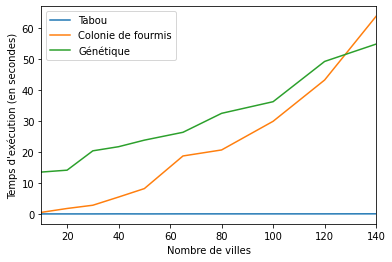

In [11]:
import matplotlib.pyplot as plt

#graphe temps d'exécution
plt.plot(listeDegre,timeTabou)
plt.plot(listeDegre,timeFourmi)
plt.plot(listeDegre,timeGenetic)

plt.legend(['Tabou', 'Colonie de fourmis', 'Génétique'])
plt.xlabel("Nombre de villes")
plt.ylabel("Temps d'exécution (en secondes)")
plt.xlim([10, 140])

plt.show()

L'algorithme tabou s'exécute vraiment très vite (légèrement au dessus de 0 secondes).

L'algorithme de colonie de fourmis met moins de temps à s'exécuter au début mais il a tendance à croitre plus rapidement que le génétique on le remarque quand le nombre de ville devient important

#### Graphe nombre de km du dernier camion sur le nombre de ville

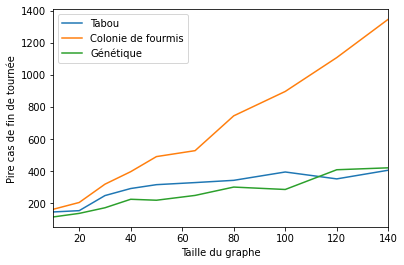

In [12]:
#graphe pire cas possible
plt.plot(listeDegre,worstTabou)
plt.plot(listeDegre,worstFourmi)
plt.plot(listeDegre,worstGenetic)

plt.legend(['Tabou', 'Colonie de fourmis', 'Génétique'])
plt.xlabel("Taille du graphe")
plt.ylabel("Pire cas de fin de tournée")
plt.xlim([10, 140])

plt.show()

En terme de qualité de la solution, le génétique est celui qui semble le plus performant à quasi-égalité avec le Tabou.

L'algorithme de colonie de fourmis lui n'est pas très optimal.

**L'algorithme Tabou** nous parait donc être un bon compromis entre rapidité d'exécution et qualité de la solution !

## Implémentation de la librairie OR-Tools

Après avoir réalisé les tests de nos 3 algorithmes et avoir déterminé que l'algorithme Tabou est le plus performant dans notre cas, nous avons chercher à utiliser algorithme externe fourni par une librairie.

Notre choix s'est porté sur la suite OR-Tools développée par Google qui est conçue pour résoudre les problèmes les plus difficiles en matière de routage de véhicules.

OR-Tools utilise une stratégie de première solution, c'est à dire qu'il utilise une méthode heuristique pour trouver une solution initiale (dans notre cas nous avons choisi la methode de l'arc le plus court).

Il utilise ensuite une méthode méta-heuristique pour trouver une solution optimale locale (dans notre cas la méthode tabou).

In [13]:
from Algorithms.or_tools import ortool_method

ortools_heuristic_route, ortools_heuristic_dist = ortool_method(grapheTable[1], vehicules)
printer(ortools_heuristic_route, ortools_heuristic_dist)

# Décommenter le code ci-dessous pour avoir un carte avec la solution
# generateMaps(ortools_heuristic_route, PointsLivraisonTable[1], "ortools_heuristic")

camion 1 : [0, 17, 14, 9, 10, 2, 1, 0] | 126 km parcourus en 1 h 34 min
camion 2 : [0, 5, 11, 6, 18, 3, 7, 0] | 117 km parcourus en 1 h 28 min
camion 3 : [0, 4, 16, 0] | 83 km parcourus en 1 h 2 min
camion 4 : [0, 13, 12, 0] | 127 km parcourus en 1 h 35 min
camion 5 : [0, 19, 15, 8, 0] | 91 km parcourus en 1 h 8 min
Au total : 544 km parcourus en 6 h 48 min




### Comparatif entre notre algorithme Tabou et celui de OR-Tools 

In [22]:
#evaluation du temps d'exécution et du résultat
Time_ortools = []
Time_tabu = []
Worst_ortools = []
Worst_tabu = []
TotalDistances_ortools = []
TotalDistances_tabu = []

for graphe in grapheTable:
    #evaluation tabou OR-Tools
    t = time.process_time()
    ortools_route, ortools_distance = ortool_method(graphe, vehicules)
    elapsed_time = time.process_time() - t
    Time_ortools.append(elapsed_time)
    Worst_ortools.append(max(ortools_distance))
    TotalDistances_ortools.append(ortools_distance)

    #evaluation tabou
    t = time.process_time()
    tabu_route, tabu_distance = tabu_method(graphe, vehicules, maxIterations)
    elapsed_time = time.process_time() - t
    Time_tabu.append(elapsed_time)
    Worst_tabu.append(max(tabu_distance))
    TotalDistances_tabu.append(tabu_distance)

print("---DONE---")

---DONE---


#### Graphe du temps d'éxécution sur le nombre de villes

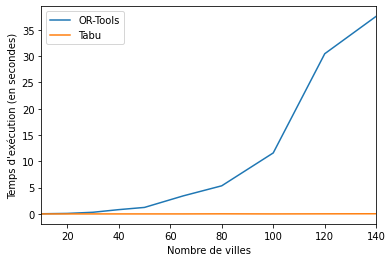

In [23]:
import matplotlib.pyplot as plt

#graphe temps d'exécution
plt.plot(listeDegre,Time_ortools)
plt.plot(listeDegre,Time_tabu)

plt.legend(['OR-Tools', 'Tabu'])
plt.xlabel("Nombre de villes")
plt.ylabel("Temps d'exécution (en secondes)")
plt.xlim([10, 140])

plt.show()

On remarque que l'algorithme Tabou est toujours très légèrement au dessus de 0s en temps d'exécution alors que celui de OR-Tools est croissant selon le nombre de ville

#### Graphe nombre de km du dernier camion sur le nombre de ville

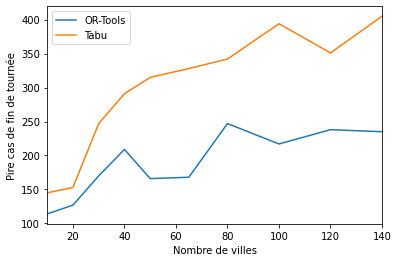

In [24]:
#graphe pire cas possible
plt.plot(listeDegre,Worst_ortools)
plt.plot(listeDegre,Worst_tabu)

plt.legend(['OR-Tools', 'Tabu'])
plt.xlabel("Nombre de villes")
plt.ylabel("Pire cas de fin de tournée")
plt.xlim([10, 140])

plt.show()

En ce qui concerne la qualité de la solution, ici on vérifie le camion ayant la pire tournée(avec le plus de km), on remarque que OR-Tools donne un résultat nettement mieux que notre algorithme tabou.

#### Graphes représentant la répartition de la distance de trajet entre chaque camion

**I - OR-Tools**

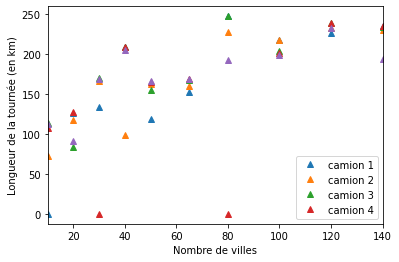

In [30]:
#graphe repartition camions
plt.plot(listeDegre, TotalDistances_ortools,"^")

plt.legend(['camion 1', 'camion 2', 'camion 3', 'camion 4'])
plt.xlabel("Nombre de villes")
plt.ylabel("Longueur de la tournée (en km)")
plt.xlim([10, 140])
plt.show()

**II - Tabou** 

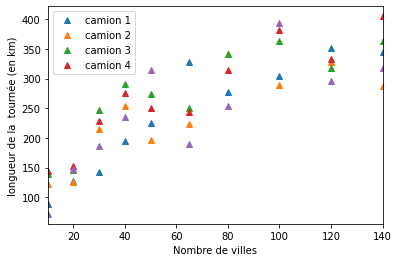

In [29]:
plt.plot(listeDegre, TotalDistances_tabu, "^")
plt.legend(['camion 1', 'camion 2', 'camion 3', 'camion 4'])
plt.xlabel("Nombre de villes")
plt.ylabel("longueur de la  tournée (en km)")
plt.xlim([10, 140])
plt.show()

On constate grace à ces deux graphiques que la longueur des tournées de chaque camion est plus rapprochée avec OR-Tools (parfois il n'utilise pas tous les camions) qu'avec l'algorithme Tabou.

**III - Conclusion**

Pour conclure ses tests nous pouvons dire que l'algorithme Tabou est le plus performant de nos 3 algorithmes initiaux, cependant OR-Tools fournit une solution bien meilleure et permet de rajouter beaucoup de contraintes supplémentaires.

C'est donc OR-Tools que nous avons choisi de garder.

## Simulation en condition réelle avec une contrainte de capacité

Pour cette simulation nous nous plaçons dans le cas ou nous devons planifier une tournée de livraison de colis à travers plusieurs villes.

OR-Tools nous permet de rajouter la contrainte de la capacité, c'est à dire que nous pouvons attribuer à chaque camion un nombre maximal colis et à chaque ville un nombre de colis à distribuer

Le but étant de remplir les camions et planifier leur tournée de sortes à minimiser le temps de retour du dernier camion.

In [41]:
from Algorithms.or_tools_CVRP import ortool_CVRP_method

nb_vehicules = 3
# Nombre de colis a déposer par villes
deliveries = [4, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 3, 2, 1]
# Nombre de colis maximum par camion
camion_capacities = [15, 15, 15]

cvrp_route, cvrp_dist, cvrp_load = ortool_CVRP_method(grapheTable[1], nb_vehicules, deliveries, camion_capacities)
print("Ici l'algorithme nous dit que pour minimiser la durée de la livraison le camion 0 doit être chargé de 15 colis et avoir le parcours suivant :")
print("\n")
for i in range(nb_vehicules):
    t = cvrp_dist[i]/vitesseMoyenne
    T = convertHeure(t)
    print(f"Camion {i} : route = {cvrp_route[i+1]} | {cvrp_dist[i]} km parcourus en {T[0]} h {T[1]} min | capacitée maximale = {cvrp_load[i]}")

# Décommenter le code ci-dessous pour avoir un carte avec la solution
# generateMaps(cvrp_route, PointsLivraisonTable[1], "ortools_cvrp")

Ici l'algorithme nous dit que pour minimiser la durée de la livraison le camion 0 doit être chargé de 15 colis et avoir le parcours suivant :


Camion 0 : route = [0, 1, 14, 12, 13, 17, 4, 16, 0] | 180 km parcourus en 2 h 15 min | capacitée maximale = 15
Camion 1 : route = [0, 5, 7, 3, 18, 6, 11, 0] | 117 km parcourus en 1 h 28 min | capacitée maximale = 14
Camion 2 : route = [0, 19, 15, 8, 9, 10, 2, 0] | 133 km parcourus en 1 h 40 min | capacitée maximale = 13


Carte de livraison générée :

<img src="https://zupimages.net/up/22/26/4faj.png" alt="Carte livraison" width="500"/>

# Conclusion

Dans la cadre de ce projet, nous avons dû dans un premier temps étudier la problématique avancée par le sujet et définir de façon collégiale un ensemble de contraintes que nous souhaiterions résoudre afin de remporter l’appel d’offre de l’ADEME. 

Dans ce contexte,  nous avons du solutionner un problème d'optimisation de tournée de livraison à plusieurs camions ayant des caractéristiques différentes.  

Nous avons ensuite modélisé ce problème, et nous avons également pu étudier sa complexité. 

S’ils sont loin d’être aussi performants et efficaces, ils ont néanmoins proposé de résultats cohérents et semblent tendre vers des chemins de longueur et durées raisonnables.

Nous avons ensuite implémenté divers algorithmes d’heuristiques et méta-heuristiques, comparé leurs résultats ainsi que leurs performances, et même pu comparer nos algorithmes à ceux produits par des géant du numériques. 

Néanmoins, certaines améliorations sont encore possibles, en raison notamment de l’absence de certaines contraintes techniques proposées dans le sujet (gestion des fenêtres de temps, trafic en direct) que nous n’avons pas pu traiter.

En outre, nous regrettons également l’absence de l’algorithme du recuit simulé, que nous avons commencé à développer mais qui n’a malheureusement pas pu être finalisé dans les temps. 

# Bibliographie

*Le problème du voyageur de commerce en informatique, Julien Baglio :* 
http://www.normalesup.org/~baglio/maths/TIPE2004-voyageur.pdf

*Théorie des graphes, Michel Rigo, Université de Lièges :*
http://www.discmath.ulg.ac.be/cours/slides03-gr.pdf

*Théorie de la complexité : The P VS NP Page, Gerhard J. Woeginger :* 
https://www.win.tue.nl/~gwoegi/P-versus-NP.htm

*Problèmes de tournées de véhicules, Thomas Chabot, 2015 :* https://corpus.ulaval.ca/jspui/bitstream/20.500.11794/26365/1/31447.pdf 

*Truck dispatching problem, Dantzig & Ramser, 1959 :* https://andresjaquep.files.wordpress.com/2008/10/2627477-clasico-dantzig.pdf

*Calcul de distance entre deux points géographique, Villemin Gérard :* http://villemin.gerard.free.fr/aGeograp/Distance.htm

*Geopy python package :* https://geopy.readthedocs.io/en/stable/#module-geopy.distance

*Source des villes de france :* https://www.data.gouv.fr/fr/datasets/listes-des-communes-geolocalisees-par-regions-departements-circonscriptions-nd/ 

*Algorithme Tabou :* http://www2.ift.ulaval.ca/~dupuis/Optimisation%20lineaire%20et%20applications/Divers%20Optimisation/Recherche_Tabou.pdf

*Colonie de fourmis :*  https://www.i3s.unice.fr/~crescenz/publications/travaux_etude/colonies_fourmis-200605-rapport.pdf